# Multiclass classification – MNIST

In [1]:
import numpy as np
import tensorflow as tf

from keras.datasets import mnist  # load dataset
from keras.models import Sequential  # to build layers
from keras.layers import Dense  # to build neurons/perceptrons on top of layers
from keras.utils import np_utils  # encoder

import matplotlib.pyplot as plt

Using TensorFlow backend.


## Load the dataset

In [2]:
# Load the data, split into training and validation tuples
(X_train, d_train), (X_validation, d_validation) = mnist.load_data()

## Visualize the density of the examples

Text(0.5,1,'Test Set Label Histogram')

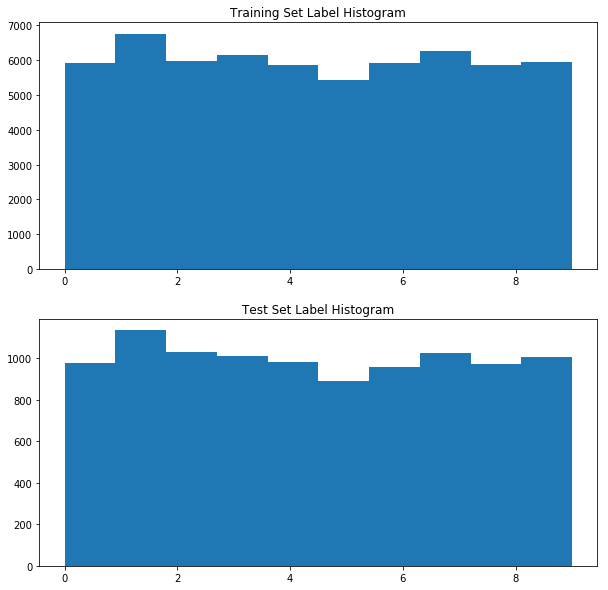

In [3]:
# Density of every class we have to train our model
plt.figure(figsize = (10,10))  # One figure

plt.subplot(211)
plt.hist(d_train[:], bins = 10)  # Histogram
plt.title("Training Set Label Histogram")

plt.subplot(212)
plt.hist(d_validation[:], bins = 10)
plt.title("Test Set Label Histogram")

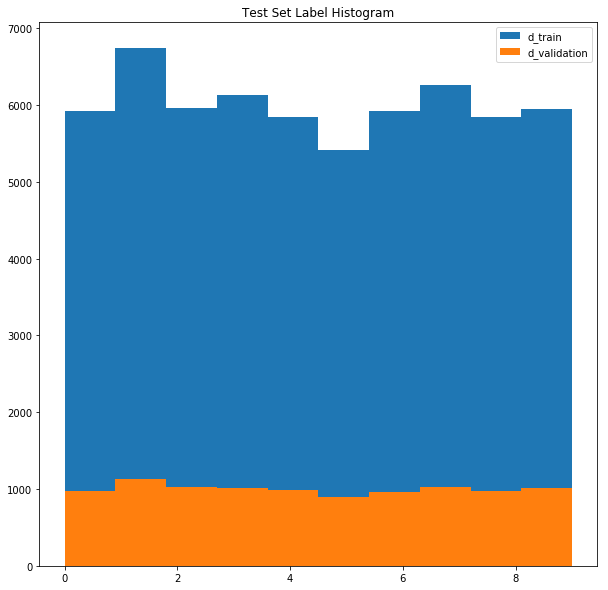

In [4]:
# Density of every class we have to train our model
plt.figure(figsize = (10,10))

plt.hist(d_train[:], bins = 10, label = "d_train")  # Histogram
plt.title("Training Set Label Histogram")

plt.hist(d_validation[:], bins = 10, label = "d_validation")
plt.title("Test Set Label Histogram")

plt.legend(loc='upper right')
# ensure that we have more or less the same amount of training data for each variable

## Clean and normalize the data

In [5]:
# 3D array
X_train.shape

(60000, 28, 28)

In [6]:
# Number of pixels of the images are 28 x 28, which equals to 784
num_pixels = X_train.shape[1] * X_train.shape[2]
print(num_pixels)

784


In [7]:
# Converting to a 2D array
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_train.shape

(60000, 784)

In [8]:
# Converting to a 2D array
X_validation = X_validation.reshape(X_validation.shape[0], num_pixels)
X_validation.shape

(10000, 784)

In [9]:
# Normalizing the data from values between 0-255 to 0-1
X_train = X_train / 255
X_validation = X_validation / 255

In [10]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
X_validation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
# Codification of Hot-Encoding
# e.g. ("table", "chair", "plant", "table") -> ([1 0 0], [0 1 0], [0 0 1], [1 0 0])
# Converting categorical data (words) into identification numbers

d_train = np_utils.to_categorical(d_train)
d_validation = np_utils.to_categorical(d_validation)

num_class = d_validation.shape[1]

print("We have", num_class, "classes")

We have 10 classes


## Create model

In [13]:
# Adding a regularizer for our model
from keras import regularizers
regularizers = regularizers.l1_l2(l1 = 0.01, l2 = 0.01)

In [14]:
# Create our model
model = Sequential()  # build layers on top of it

# Number of inputs
inputs = num_pixels  # 784
# Number of outputs
outputs = num_class  # 10

# INPUT LAYER
# Connects with 784 neurons/perceptrons, has 784 inputs, activation function
model.add(Dense(inputs, 
                input_dim = inputs, 
                activation = "relu", 
                kernel_initializer = "normal"))

# OUTPUT LAYER
model.add(Dense(outputs, 
                activation = "softmax",  # Normally used for Multiclass Classifications: calculates the accuracy of each variable
                kernel_initializer = "normal", 
                kernel_regularizer = regularizers))

In [15]:
# Number of parameters
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


## Compile the model
model.compile(loss = "categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

In [16]:
# Compile the model
# Adding our own Optimizer (instead of the standard "adam" method)
from keras.optimizers import RMSprop
optimizer = RMSprop(learning_rate = 0.01, rho = 0.9)

model.compile(loss = "categorical_crossentropy",
              optimizer = optimizer,
              metrics = ["accuracy"])

## Train the model 

In [17]:
# We add an EarlyStopping function which helps us prevent OverFitting of our model
from keras.callbacks import EarlyStopping
early_stopping_callback = EarlyStopping(monitor = 'accuracy',
                                        min_delta = 0.01,  # minimum change in the monitored quantity to qualify as an improvement
                                        patience = 2)  # min_delta needs to happen 3 times to stop

In [18]:
# Train and optimize the model
trained_model = model.fit(X_train, 
                          d_train, 
                          validation_data = (X_validation, d_validation),  # Monitors the accuracy to compare with the validation data
                          epochs = 50,  # iterations
                          batch_size = 200,  # every 200 images it updates the weights of the model
                          callbacks = [early_stopping_callback])  # Adding our EarlyStopping function

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 82us/step - loss: 1.1159 - accuracy: 0.8887 - val_loss: 0.7599 - val_accuracy: 0.9302
Epoch 2/50
60000/60000 [==============================] - 4s 68us/step - loss: 0.7083 - accuracy: 0.9409 - val_loss: 0.6990 - val_accuracy: 0.9424
Epoch 3/50
60000/60000 [==============================] - 5s 77us/step - loss: 0.6599 - accuracy: 0.9512 - val_loss: 0.6339 - val_accuracy: 0.9570
Epoch 4/50
60000/60000 [==============================] - 4s 74us/step - loss: 0.6347 - accuracy: 0.9565 - val_loss: 0.6213 - val_accuracy: 0.9577
Epoch 5/50
60000/60000 [==============================] - 4s 60us/step - loss: 0.6187 - accuracy: 0.9597 - val_loss: 0.6151 - val_accuracy: 0.9617


In [19]:
# Both accuracy and val_accuracy are over 90%, meaning that the model seems to work
# Save the model
model.save("MyNetworkMNIST.h5")

## Test with another case

Estimated digit: [2]


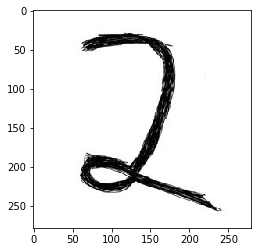

In [20]:
from PIL import Image

img = Image.open("2.jpg")
plt.imshow(img)  # shows image: currently 260 x 260

import cv2
img_array = np.asarray(img)
resized = cv2.resize(img_array, (28,28))  # Scales the image
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)  # Converts to gray scale
image = cv2.bitwise_not(gray_scale)  # Pure black and white (same as MNIST data)

image = image / 255
image = image.reshape(1, 784)
prediction = model.predict_classes(image)  # Predicts the class (variable)
print("Estimated digit:", str(prediction))

Estimated digit: [7]


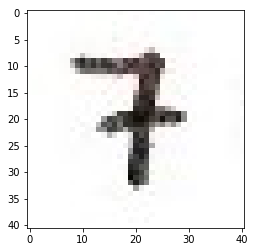

In [21]:
from PIL import Image
img = Image.open("7.jpg")
plt.imshow(img)  # shows image: currently 260 x 260

import cv2
img_array = np.asarray(img)
resized = cv2.resize(img_array, (28,28))  # Scales the image
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)  # Converts to gray scale
image = cv2.bitwise_not(gray_scale)  # Pure black and white (same as MNIST data)

image = image / 255
image = image.reshape(1, 784)
prediction = model.predict_classes(image)  # Predicts the class (variable)
print("Estimated digit:", str(prediction))

Estimated digit: [5]


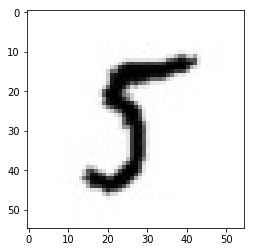

In [22]:
from PIL import Image
img = Image.open("5.jpg")
plt.imshow(img)  # shows image: currently 260 x 260

import cv2
img_array = np.asarray(img)
resized = cv2.resize(img_array, (28,28))  # Scales the image
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)  # Converts to gray scale
image = cv2.bitwise_not(gray_scale)  # Pure black and white (same as MNIST data)

image = image / 255
image = image.reshape(1, 784)
prediction = model.predict_classes(image)  # Predicts the class (variable)
print("Estimated digit:", str(prediction))

Estimated digit: [4]


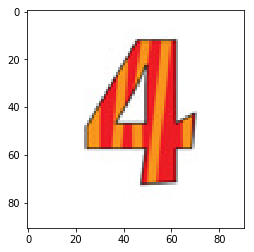

In [23]:
from PIL import Image
img = Image.open("4.jpg")
plt.imshow(img)  # shows image: currently 260 x 260

import cv2
img_array = np.asarray(img)
resized = cv2.resize(img_array, (28,28))  # Scales the image
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)  # Converts to gray scale
image = cv2.bitwise_not(gray_scale)  # Pure black and white (same as MNIST data)

image = image / 255
image = image.reshape(1, 784)
prediction = model.predict_classes(image)  # Predicts the class (variable)
print("Estimated digit:", str(prediction))

## Visualize the Neural Network

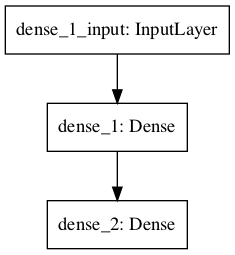

In [24]:
# Model Visualization
from keras.utils import plot_model

plot_model(model, to_file='model.png')

In [25]:
# Visualize the Neural Network
#from ann_visualizer.visualize import ann_viz;

# Saves image as PDF
#ann_viz(model, view = True, filename = "neural-network", title = "My Neural Network – MNIST")

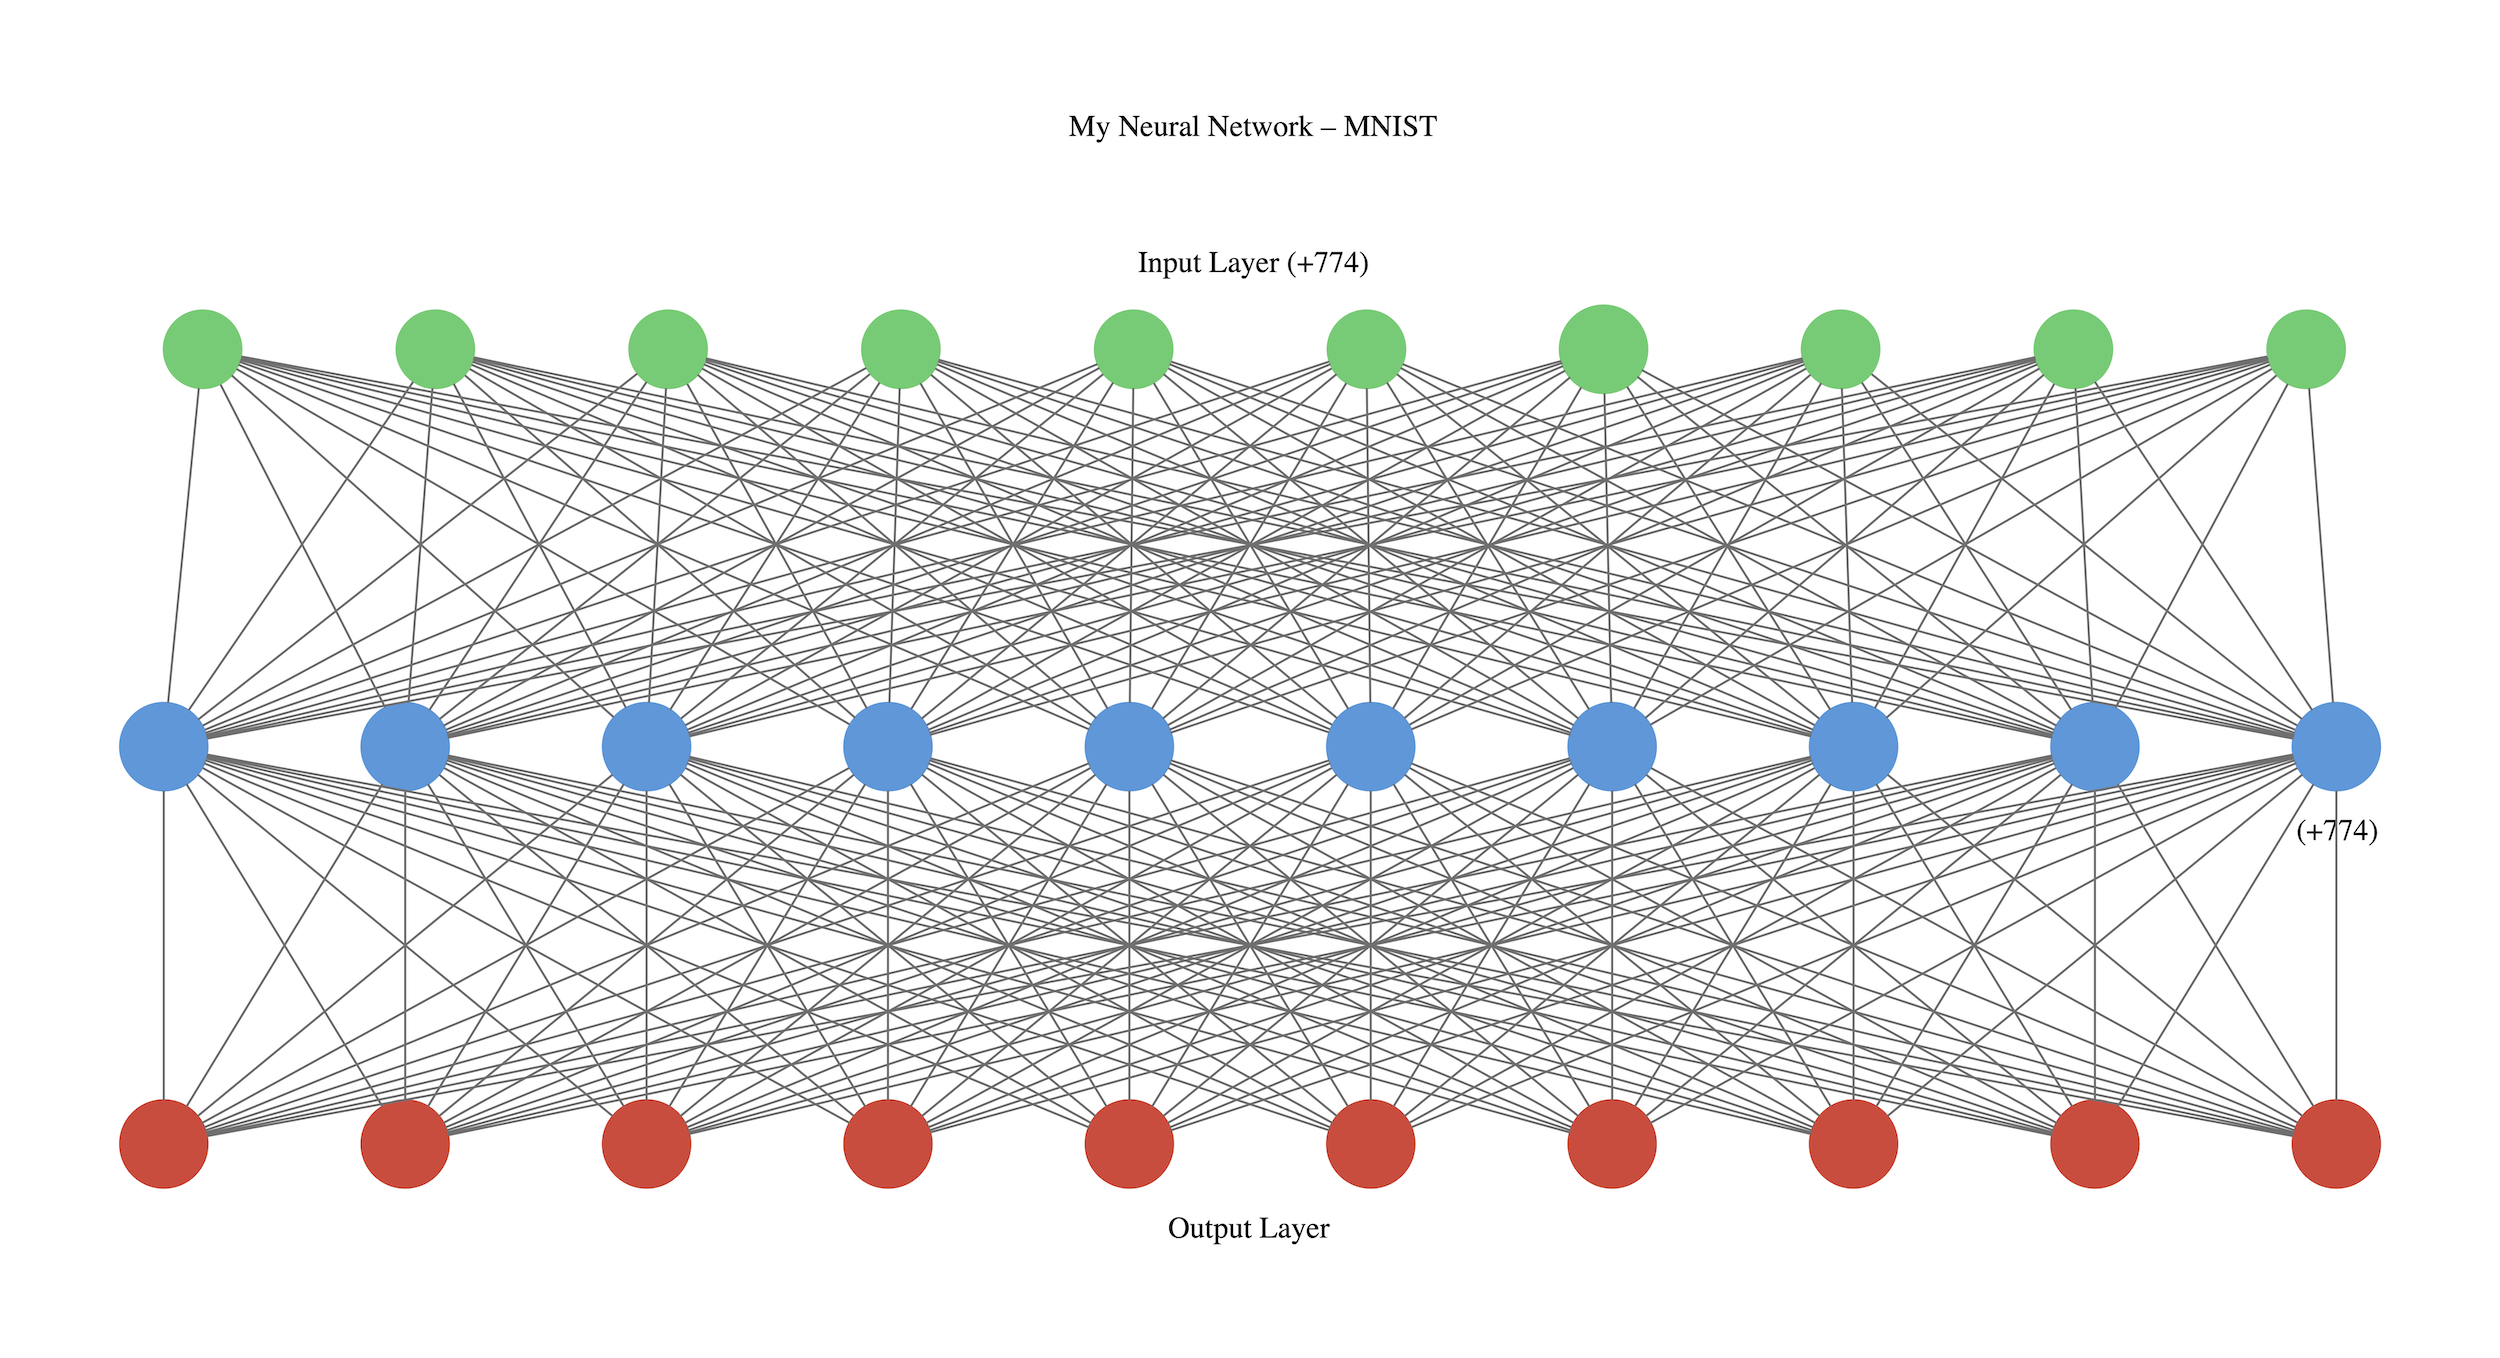

In [26]:
# Visualize the Neural Network
from IPython.display import Image

Image("neural-network.png")
# Dense (fully connected) Neural Network

## Visualize the model

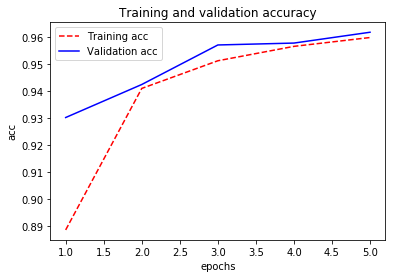

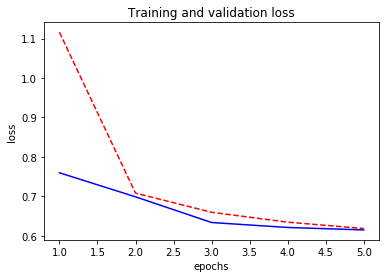

In [27]:
# x-axis = array of epochs (length of history)
# y = history of accuracy

acc       = trained_model.history['accuracy']
val_acc   = trained_model.history['val_accuracy']
loss      = trained_model.history['loss']
val_loss  = trained_model.history['val_loss']

epochs = range(1, len(acc) + 1, 1)  # starting point, last point, steps

plt.plot(epochs, acc, 'r--', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r--')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epochs')

plt.savefig('chart.png', figsize = (18, 12), dpi = 300, transparent = True)